## Credit Default prdiction challenge

---
Load Data

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle datasets download raddar/amex-data-integer-dtypes-parquet-format
! kaggle competitions download amex-default-prediction -f train_labels.csv


!unzip amex-data-integer-dtypes-parquet-format.zip
!unzip train_labels.csv.zip

amex-data-integer-dtypes-parquet-format.zip: Skipping, found more recently modified local copy (use --force to force download)
train_labels.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  amex-data-integer-dtypes-parquet-format.zip
replace test.parquet? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  train_labels.csv.zip
replace train_labels.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
import pandas as pd 

In [ ]:
train_IDs = pd.read_parquet('/content/train.parquet', columns=['customer_ID'])
print(f"train data # unique customer IDs : {train_IDs['customer_ID'].nunique()} \ from {train_IDs.shape[0]}")

train data # unique customer IDs : 458913 \ from 5531451


In [ ]:
test_IDs = pd.read_parquet('/content/test.parquet', columns=['customer_ID'])
print(f"test data # unique customer IDs : {test_IDs['customer_ID'].nunique()} \ from {test_IDs.shape[0]}")

train data # unique customer IDs : 924621 \ from 11363762


In [ ]:
train_labels = pd.read_csv('/content/train_labels.csv')
print(f"train label data # unique customer IDs : {train_labels['customer_ID'].nunique()} \ from {train_labels.shape[0]}")

train label data # unique customer IDs : 458913 \ from 458913


---
Preview Data

In [ ]:
import os
import random 
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns

pd.set_option('display.max_columns', None)
random.seed(75)


In [ ]:
train_X_df = pd.read_parquet('/content/train.parquet')
print(f"Shape = {train_X_df.shape}, number of customers = {train_X_df['customer_ID'].nunique()}")
train_X_df.head()

Shape = (5531451, 190), number of customers = 458913


,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0,0.008724,1.006838,0.009228,0.124035,0.0,0.004709,NaN,NaN,0,6,0.708906,0.170600,0,0.358587,0.525351,0.255736,-1,0.063902,0.059416,0.0,0.148698,4,0.008207,0,0.207334,0.736463,0.096219,NaN,0.023381,0.002768,0,1.0,0,0.161345,0.148266,2896,0.354596,0.152025,0.118075,0,0.158612,0.065728,0.018385,8,0.199617,0.308233,0.016361,15,0.091071,0,0,0,0,NaN,0.652984,0,-1,0,6,0.272008,0.008363,524,0.002644,0.009013,0,0,0.119403,0,4,0.050882,NaN,0.0,1,1,NaN,0.004327,0.0,NaN,0.007729,0.000272,0,0,0,-1,0.002271,0,0,0,0.002310,0,1,0.008033,1.0,0.084683,0,0,0.0,0,0,0,NaN,0,0,0,-1,0,0,NaN,1,0.002537,0,0,0,0,0,1,0,0,0,3,1,0,0,0,0,0,0.894090,0.135561,0.911191,0.974539,0.001243,0.766688,1,1.004587,0.893734,-1,2,0.009968,0.004572,-1,1.008949,2,-1,0,NaN,-1,NaN,1.0,0.210060,0.676922,0,1,0.238250,0,5,0.232120,0.236266,0,0.702280,3,0,16,0,2,1,1.007819,1,0,NaN,0.0,0.0,NaN,0.004345,0,NaN,-1,-1,-1,-1,0,0,0.0,NaN,0,0.000610,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0,0.004923,1.000653,0.006151,0.126750,0.0,0.002714,NaN,NaN,0,5,0.712795,0.113239,0,0.353630,0.521311,0.223329,-1,0.065261,0.057744,0.0,0.149723,4,0.008373,0,0.202778,0.720886,0.099804,NaN,0.030599,0.002749,0,1.0,0,0.140951,0.143530,2896,0.326757,0.156201,0.118737,0,0.148459,0.093935,0.013035,8,0.151387,0.265026,0.017688,15,0.086805,0,0,0,0,NaN,0.647093,0,-1,0,6,0.188970,0.004030,524,0.004193,0.007842,0,0,0.140611,0,4,0.040469,NaN,0.0,1,1,NaN,0.004203,0.0,NaN,0.001864,0.000979,0,0,0,-1,0.009810,0,0,0,0.001327,0,1,0.000760,1.0,0.081843,0,0,0.0,0,0,0,NaN,0,0,0,-1,0,0,NaN,1,0.008427,0,0,0,0,0,1,0,0,0,3,1,0,0,0,0,0,0.902135,0.136333,0.919876,0.975625,0.004561,0.786007,1,1.004118,0.906841,-1,2,0.003921,0.004654,-1,1.003205,2,-1,0,NaN,-1,NaN,1.0,0.184093,0.822281,0,1,0.247217,0,5,0.243532,0.241885,0,0.707017,3,0,16,0,2,1,1.004333,1,0,NaN,0.0,0.0,NaN,0.007495,0,NaN,-1,-1,-1,-1,0,0,0.0,NaN,0,0.005492,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,3,0.021655,1.009672,0.006815,0.123977,0.0,0.009423,NaN,NaN,0,5,0.720884,0.060492,0,0.334650,0.524568,0.189424,-1,0.066982,0.056647,0.0,0.151955,4,0.009355,0,0.206629,0.738044,0.134073,NaN,0.048367,0.010077,0,1.0,0,0.112229,0.137014,3166,0.304124,0.153795,0.114534,0,0.139504,0.084757,0.056653,8,0.305883,0.212165,0.063955,15,0.094001,0,0,0,0,NaN,0.645819,0,-1,0,6,0.495308,0.006838,702,0.001337,0.006025,0,0,0.075868,0,4,0.047454,NaN,0.0,1,1,NaN,0.001782,0.0,NaN,0.005419,0.006149,0,0,0,-1,0.009362,0,0,0,0.007624,0,1,0.004056,1.0,0.081954,0,0,0.0,0,0,0,NaN,0,0,0,-1,0,0,NaN,1,0.007327,0,0,0,0,0,1,0,0,0,3,1,0,0,0,0,0,0.939654,0.134938,0.958699,0.974067,0.011736,0.806840,1,1.009285,0.928719,-1,2,0.001264,0.019176,-1,1.000754,2,-1,0,NaN,-1,NaN,1.0,0.154837,0.853498,0,1,0.239867,0,5,0.240768,0.239710,0,0.704843,3,0,16,0,2,1,1.007831,1,0,NaN,0.0,0.0,NaN,0.009227,0,NaN,-1,-1,-1,-1,0,0,0.0,NaN,0,0.006986,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0,0.013683,1.0027

In [ ]:
# test_X_df = pd.read_parquet('/content/test.parquet')

In [ ]:
train_df = train_X_df # prop

# train_y_df = pd.read_csv('/content/train_labels.csv')
# train_df = pd.merge(left=train_X_df, right=train_y_df, on='customer_ID', how='left')

# print(f"train data size : {train_X_df.shape} | joined train df size : {train_df.shape}")

In [ ]:
# r = train_X_df['customer_ID'].value_counts()
# cus_list = r.index[r == 13]
# sub_df = train_df.loc[train_df['customer_ID'].isin(cus_list[:100]), :]

# subset_cols = list(train_df.columns)
# subset_cols.pop(1)
# sub_df[sub_df.duplicated(subset=subset_cols)]

> it is safe to say that no duplicated rows exists in the training dataset

In [ ]:
def getDuplicateColumns(df):
    duplicateColumnNames = set()
    for x in range(df.shape[1]):
        col = df.iloc[:, x]
        for y in range(x + 1, df.shape[1]):
            otherCol = df.iloc[:, y]
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)

In [ ]:
# getDuplicateColumns(train_X_df)

> no duplicated columns exists

In [ ]:
# train_df.info()

In [ ]:
# train_df.loc[:, train_df.dtypes == object].head()

> customer_ID won't be a feature in model training. \
> Also, datetime won't be a direct feature in the final model, instead use engineered features such as month, year from this feature.

In [ ]:
# define column types 

cat_cols = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']
drop_cols = ['customer_ID', 'S_2']
num_cols = [c for c in train_X_df.columns if (c not in cat_cols) and (c not in drop_cols)]

col_type_dict = {}
for c in cat_cols:
    col_type_dict[c] = 'categorical'
for c in drop_cols:
    col_type_dict[c] = 'drop' 
for c in num_cols:
    col_type_dict[c] = 'numerical'

col_type_dict['target'] = 'categorical'

In [ ]:
# # target correlation dict 
# corr_dict = {}
# for c in train_df.columns:
#     if c in drop_cols:
#         corr_dict[c] = 0.0
#     else:
#         corr_dict[c] = train_df['target'].corr(train_df[c])

In [ ]:
# plt.figure(figsize=(16,4))
# ax = sns.lineplot(train_df.columns, list(corr_dict.values()))
# ax.set_xticklabels(train_df.columns, rotation=45, horizontalalignment='right')
# ax.set_title("correlation of features with the target")

In [ ]:
df_len = train_X_df.shape[0]
nan_ser = train_df.isna().sum()
nan_df = pd.DataFrame(np.array([nan_ser.index, nan_ser.values, nan_ser.values/df_len]).T, columns=['column', 'nan count', 'nan perc.'])
nan_df.sort_values(by='nan perc.', ascending=False, inplace=True)
nan_df['col type'] = nan_df['column'].apply(lambda x: col_type_dict[x])
# nan_df['target corr'] = nan_df['column'].apply(lambda x: corr_dict[x])
nan_df

,column,nan count,nan perc.,col type
111,D_88,5525447,0.998915,numerical
148,D_110,5500117,0.994335,numerical
150,B_39,5497819,0.99392,numerical
74,D_73,5475595,0.989902,numerical
172,B_42,5459973,0.987078,numerical
...,...,...,...,...
84,D_78,0,0.0,numerical
85,D_79,0,0.0,numerical
86,R_8,0,0.0,numerical
87,R_9,0,0.0,numerical


In [ ]:
drop_nan_cols = list(nan_df.loc[nan_df['nan perc.']>0.6, 'column'].values)
drop_nan_cols

['D_88',
 'D_110',
 'B_39',
 'D_73',
 'B_42',
 'D_134',
 'B_29',
 'D_132',
 'D_76',
 'D_42',
 'D_142',
 'D_53']

In [ ]:
# nan_df[nan_df['nan perc.']> 0.6]

In [ ]:
# nan_df[(nan_df['nan perc.']> 0.1)&(nan_df['nan perc.']<0.6)]

In [ ]:
# nan_df[nan_df['nan perc.']==0.0]

In [ ]:
# check for categorical feature variable count
for c in cat_cols:
    print(c, train_X_df[c].nunique())

B_30 4
B_38 8
D_114 3
D_116 3
D_117 8
D_120 3
D_126 4
D_63 6
D_64 5
D_66 3
D_68 8


In [ ]:
for c in cat_cols:
    print(c, train_X_df[c].value_counts())

B_30  0    4710663
 1     763955
 2      54817
-1       2016
Name: B_30, dtype: int64
B_38  2    1953232
 3    1255315
 1    1160047
 5     444856
 4     294917
 7     259028
 6     162040
-1       2016
Name: B_38, dtype: int64
D_114  1    3316478
 0    2038257
-1     176716
Name: D_114, dtype: int64
D_116  0    5348109
-1     176716
 1       6626
Name: D_116, dtype: int64
D_117  0    1456084
 4    1166400
 5    1138666
 3     666808
 6     459290
 7     344520
-1     176716
 2     122967
Name: D_117, dtype: int64
D_120  0    4729723
 1     625012
-1     176716
Name: D_120, dtype: int64
D_126  2    4262414
 1     891323
 0     260898
-1     116816
Name: D_126, dtype: int64
D_63 3    4119621
0     930133
4     438390
1      25786
2      10556
5       6965
Name: D_63, dtype: int64
D_64  0    2913244
 3    1523448
 2     840112
-1     217442
 1      37205
Name: D_64, dtype: int64
D_66 -1    4908097
 1     617066
 0       6288
Name: D_66, dtype: int64
D_68  6    2782455
 5    1201706
 3   

In [ ]:
# drop highly missing columns
# missing_cols = nan_df[nan_df['nan perc.']> 0.0].column.values 
# drp_train_df = train_df.drop(columns=missing_cols)
# print(drp_train_df.shape)
# drp_train_df.head()

(5531451, 123)


---
Check for `-1` , negative one NAN value

In [ ]:
h, _ = train_df.shape
data_list = []
for c in train_df.columns:
    c_ = (train_df[c]==-1).sum()
    c_t = train_df[c].dtype
    data_list.append([c, c_, (c_/h)*100, c_t])
    # print(f"Column {c} -1 value count {c} as percentage {(c_/h)*100} of type {c_t}")

min1_df = pd.DataFrame(np.array(data_list), columns=['feature', '-1 count', '-1 percentage', 'ft type'])
min1_df['nan count'] = train_df.isna().sum().values

In [ ]:
min1_df.sort_values(by='-1 percentage', ascending=False).head(20)

,feature,-1 count,-1 percentage,ft type,nan count
108,D_87,5527586,99.930127,int8,0
146,D_108,5502513,99.476846,int8,0
149,D_111,5500117,99.43353,int8,0
182,D_138,5336752,96.480146,int8,0
181,D_137,5336752,96.480146,int8,0
180,D_136,5336752,96.480146,int8,0
179,D_135,5336752,96.480146,int8,0
87,R_9,5218918,94.349891,int8,0
139,D_106,4990102,90.213255,int16,0
20,D_49,4985917,90.137597,int16,0


In [ ]:
drop_min1_cols = list(min1_df.loc[min1_df['-1 percentage'] > 20.0, 'feature'].values)
drop_min1_cols

['D_49',
 'D_66',
 'R_9',
 'D_82',
 'D_87',
 'D_106',
 'R_26',
 'D_108',
 'D_111',
 'D_135',
 'D_136',
 'D_137',
 'D_138']

In [ ]:
# cat && -1 drop features
set(drop_min1_cols) & set(cat_cols)

{'D_66'}

In [ ]:
# drop nan && drop -1 features
set(drop_nan_cols) & set(drop_min1_cols)

set()

In [ ]:
check_min1_cols = list(min1_df.loc[(min1_df['-1 percentage'] > 0.0)&(min1_df['-1 percentage'] < 20.0), 'feature'].values)
check_min1_cols

['D_44',
 'D_59',
 'D_64',
 'B_16',
 'B_19',
 'B_20',
 'D_68',
 'B_22',
 'D_70',
 'D_72',
 'D_74',
 'D_78',
 'D_79',
 'D_80',
 'D_81',
 'D_83',
 'D_84',
 'B_30',
 'R_20',
 'B_33',
 'D_89',
 'D_91',
 'D_103',
 'D_107',
 'B_38',
 'D_109',
 'D_113',
 'D_114',
 'D_116',
 'D_117',
 'D_120',
 'D_122',
 'D_123',
 'D_124',
 'D_125',
 'D_126',
 'D_129',
 'B_41',
 'D_139',
 'D_140',
 'D_143',
 'D_145']

---
Check for value distribution

In [ ]:
sub_df1 = train_df.loc[:, check_min1_cols].sample(frac=0.1).fillna(-999)
melt_cols = sub_df1.columns
sub_df1.reset_index(inplace=True)

In [ ]:
sub_df1.head()

,index,D_44,D_59,D_64,B_16,B_19,B_20,D_68,B_22,D_70,D_72,D_74,D_78,D_79,D_80,D_81,D_83,D_84,B_30,R_20,B_33,D_89,D_91,D_103,D_107,B_38,D_109,D_113,D_114,D_116,D_117,D_120,D_122,D_123,D_124,D_125,D_126,D_129,B_41,D_139,D_140,D_143,D_145
0,831658,2,52,2,0,0,0,6,0,1,0,6,0,0,0,0,0,0,0,0,1,0,0,1,1,2,0,0,1,0,0,1,3,0,7,0,2,0,0,0,0,0,0
1,3678085,1,23,0,6,36,0,6,0,1,0,4,0,0,2,0,0,0,0,0,1,0,0,0,0,7,0,0,1,0,4,0,2,0,10,0,2,1,0,0,0,0,0
2,574637,0,8,0,12,25,17,6,1,1,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,3,0,0,0,0,3,0,3,0,5,0,2,0,0,0,0,0,0
3,4029039,0,29,0,0,0,0,6,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2,0,0,1,0,6,1,3,0,5,0,2,1,0,0,0,0,0
4,1303508,0,25,0,1,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,2,0,1,1,0,0,0,1,0,8,0,2,1,0,0,0,0,0


In [ ]:
sub_df1['D_44'].unique()

array([ 0, -1,  1,  3,  5, 18,  2,  7,  4,  8, 17,  6,  9, 15, 10, 13, 25,
       11, 23, 14, 12, 16, 19, 24, 22, 21, 27, 20, 26, 32], dtype=int8)

In [ ]:
df3.head()

,index,variable,value
0,831658,D_44,2
1,3678085,D_44,1
2,574637,D_44,0
3,4029039,D_44,0
4,1303508,D_44,0


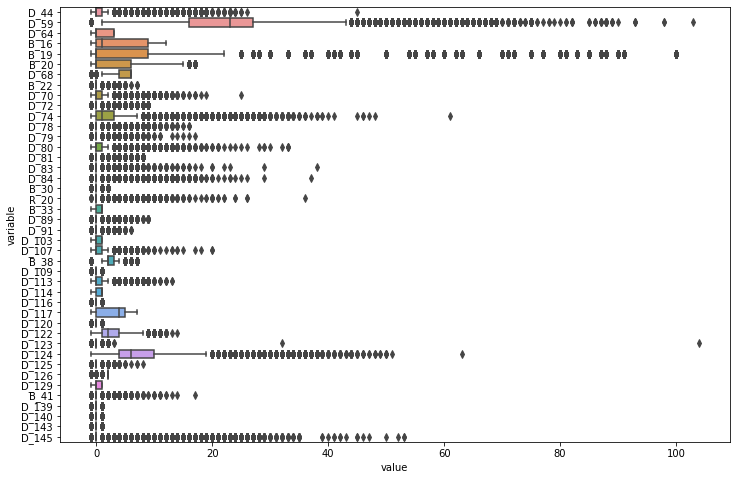

In [ ]:
df3 = pd.melt(sub_df1, id_vars=['index'], value_vars=melt_cols)
df3['value'] = df3['value'].astype(np.float16)
# df3.head()
plt.figure(figsize=(12,8))
sns.boxplot(data=df3, x='value', y='variable')

---
Check for `0`, NAN value

In [ ]:
h, _ = train_df.shape
data_list = []
for c in train_df.columns[2:]:
    c_ = (train_df[c].astype(float)==0.0).sum()
    c_t = train_df[c].dtype
    uniq = 0 # train_df[c].nunique()
    
    data_list.append([c, c_, (c_/h)*100, c_t, uniq])
    # print(f"Column {c} -1 value count {c} as percentage {(c_/h)*100} of type {c_t}")

zero_df = pd.DataFrame(np.array(data_list), columns=['feature', '0 count', '0 percentage', 'ft type', 'n uniques'])
zero_df['nan count'] = train_df.isna().sum().values[2:]
zero_df.sort_values(by='0 count', ascending=False, inplace=True)


In [ ]:
zero_df.head(60)

,feature,0 count,0 percentage,ft type,n uniques,nan count
108,R_18,5531015,99.992118,int8,0,0
120,R_23,5529815,99.970424,int8,0,0
175,R_28,5527348,99.925824,int8,0,0
145,D_109,5520677,99.805223,int8,0,0
126,R_25,5513719,99.679433,int8,0,0
119,R_22,5511507,99.639444,int8,0,0
107,R_17,5496923,99.375788,int8,0,0
96,R_13,5481116,99.090022,int8,0,0
123,D_93,5475553,98.989451,int8,0,0
114,S_20,5462374,98.751196,int8,0,0


In [ ]:
zero_drop_cols = list(zero_df.loc[zero_df['0 percentage']>90.0, 'feature'].values)

In [ ]:
zero_drop_cols

['R_18',
 'R_23',
 'R_28',
 'D_109',
 'R_25',
 'R_22',
 'R_17',
 'R_13',
 'D_93',
 'S_20',
 'R_24',
 'R_14',
 'D_89',
 'R_20',
 'R_15',
 'R_21',
 'D_94',
 'R_19',
 'R_8',
 'B_41',
 'B_32',
 'R_4',
 'R_7',
 'S_18',
 'R_5',
 'D_140',
 'D_96',
 'D_86',
 'D_116',
 'D_81',
 'R_2',
 'D_65',
 'D_84',
 'R_10',
 'D_72',
 'D_83',
 'D_123',
 'R_16',
 'R_11',
 'D_92']

In [ ]:
# get finalized numerical columns 
fin_num_cols = []
skip_cols = list(set(drop_min1_cols)|set(drop_nan_cols)|set(drop_cols)|set(zero_drop_cols))
for c in train_df.columns:
    if c not in skip_cols:
        fin_num_cols.append(c)

print(fin_num_cols)

['P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41', 'B_3', 'D_43', 'D_44', 'B_4', 'D_45', 'B_5', 'D_46', 'D_47', 'D_48', 'B_6', 'B_7', 'B_8', 'D_50', 'D_51', 'B_9', 'R_3', 'D_52', 'P_3', 'B_10', 'S_5', 'B_11', 'S_6', 'D_54', 'S_7', 'B_12', 'S_8', 'D_55', 'D_56', 'B_13', 'D_58', 'S_9', 'B_14', 'D_59', 'D_60', 'D_61', 'B_15', 'S_11', 'D_62', 'D_63', 'D_64', 'B_16', 'B_17', 'B_18', 'B_19', 'B_20', 'D_68', 'S_12', 'R_6', 'S_13', 'B_21', 'D_69', 'B_22', 'D_70', 'D_71', 'S_15', 'B_23', 'P_4', 'D_74', 'D_75', 'B_24', 'D_77', 'B_25', 'B_26', 'D_78', 'D_79', 'S_16', 'D_80', 'B_27', 'S_17', 'R_12', 'B_28', 'B_30', 'B_31', 'S_19', 'B_33', 'D_91', 'S_22', 'S_23', 'S_24', 'S_25', 'S_26', 'D_102', 'D_103', 'D_104', 'D_105', 'D_107', 'B_36', 'B_37', 'R_27', 'B_38', 'D_112', 'B_40', 'S_27', 'D_113', 'D_114', 'D_115', 'D_117', 'D_118', 'D_119', 'D_120', 'D_121', 'D_122', 'D_124', 'D_125', 'D_126', 'D_127', 'D_128', 'D_129', 'D_130', 'D_131', 'D_133', 'D_139', 'D_141', 'D_143', 'D_144', 'D_145']


In [ ]:
import json 

In [ ]:
col_dict = {
    "drop -1": drop_min1_cols,
    "drop nan": drop_nan_cols,
    "drop 0": zero_drop_cols,
    "drop object": drop_cols,
    "cats": cat_cols,
    "usable": fin_num_cols
}

In [ ]:
with open("/content/col_dict.json", 'w') as pf:
    json.dump(col_dict, pf)

In [ ]:
skip_cols = list(set(drop_min1_cols)|set(zero_drop_cols))
non_skip_cat_cols = [c for c in cat_cols if c not in skip_cols]
cat_df = train_df.loc[:, non_skip_cat_cols]
cat_df.isna().sum()

B_30     0
B_38     0
D_114    0
D_117    0
D_120    0
D_126    0
D_63     0
D_64     0
D_68     0
dtype: int64

In [ ]:
cat_df1 = cat_df.replace(-1, np.nan)
cat_df1.isna().sum()

B_30       2016
B_38       2016
D_114    176716
D_117    176716
D_120    176716
D_126    116816
D_63          0
D_64     217442
D_68     216503
dtype: int64

In [ ]:
train_X_df1 = pd.concat([train_df.loc[:, fin_num_cols], cat_df1], axis=1)
train_X_df1.shape

del cat_df1 

In [ ]:
train_X_df1.head()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,D_44,B_4,D_45,B_5,D_46,D_47,D_48,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,S_5,B_11,S_6,D_54,S_7,B_12,S_8,D_55,D_56,B_13,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,B_16,B_17,B_18,B_19,B_20,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,S_15,B_23,P_4,D_74,D_75,B_24,D_77,B_25,B_26,D_78,D_79,S_16,D_80,B_27,S_17,R_12,B_28,B_31,S_19,B_33,D_91,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_107,B_36,B_37,R_27,D_112,B_40,S_27,D_113,D_115,D_118,D_119,D_121,D_122,D_124,D_125,D_127,D_128,D_129,D_130,D_131,D_133,D_139,D_141,D_143,D_144,D_145,B_30,B_38,D_114,D_117,D_120,D_126,D_63,D_64,D_68
0,0.938469,0,0.008724,1.006838,0.009228,0.124035,0.0,0.004709,NaN,0,6,0.708906,0.170600,0.358587,0.525351,0.255736,0.063902,0.059416,0.0,0.148698,4,0.008207,0,0.207334,0.736463,0.096219,0.023381,0.002768,0,1.0,0.161345,0.148266,2896,0.354596,0.152025,0.118075,0.158612,0.065728,0.018385,8,0.199617,0.308233,0.016361,15,0.091071,0,NaN,0.652984,0,0,0.272008,0.008363,524,0.002644,0.009013,0,0,0.119403,4,0.050882,0.0,1,1,0.004327,NaN,0.007729,0.000272,0,0,0.002271,0,0.002310,0.008033,1.0,0.084683,1,0.002537,1,3,0.894090,0.135561,0.911191,0.974539,0.001243,0.766688,1,1.004587,0.893734,2,0.009968,0.004572,1.008949,1.0,0.210060,0.676922,0,0.238250,0.232120,0.236266,0.702280,3,16,0,1,1.007819,1,0.0,0.0,0.004345,0,0.0,0,0.000610,0,0.0,2.0,1.0,5.0,0.0,2.0,0,0.0,6.0
1,0.936665,0,0.004923,1.000653,0.006151,0.126750,0.0,0.002714,NaN,0,5,0.712795,0.113239,0.353630,0.521311,0.223329,0.065261,0.057744,0.0,0.149723,4,0.008373,0,0.202778,0.720886,0.099804,0.030599,0.002749,0,1.0,0.140951,0.143530,2896,0.326757,0.156201,0.118737,0.148459,0.093935,0.013035,8,0.151387,0.265026,0.017688,15,0.086805,0,NaN,0.647093,0,0,0.188970,0.004030,524,0.004193,0.007842,0,0,0.140611,4,0.040469,0.0,1,1,0.004203,NaN,0.001864,0.000979,0,0,0.009810,0,0.001327,0.000760,1.0,0.081843,1,0.008427,1,3,0.902135,0.136333,0.919876,0.975625,0.004561,0.786007,1,1.004118,0.906841,2,0.003921,0.004654,1.003205,1.0,0.184093,0.822281,0,0.247217,0.243532,0.241885,0.707017,3,16,0,1,1.004333,1,0.0,0.0,0.007495,0,0.0,0,0.005492,0,0.0,2.0,1.0,5.0,0.0,2.0,0,0.0,6.0
2,0.954180,3,0.021655,1.009672,0.006815,0.123977,0.0,0.009423,NaN,0,5,0.720884,0.060492,0.334650,0.524568,0.189424,0.066982,0.056647,0.0,0.151955,4,0.009355,0,0.206629,0.738044,0.134073,0.048367,0.010077,0,1.0,0.112229,0.137014,3166,0.304124,0.153795,0.114534,0.139504,0.084757,0.056653,8,0.305883,0.212165,0.063955,15,0.094001,0,NaN,0.645819,0,0,0.495308,0.006838,702,0.001337,0.006025,0,0,0.075868,4,0.047454,0.0,1,1,0.001782,NaN,0.005419,0.006149,0,0,0.009362,0,0.007624,0.004056,1.0,0.081954,1,0.007327,1,3,0.939654,0.134938,0.958699,0.974067,0.011736,0.806840,1,1.009285,0.928719,2,0.001264,0.019176,1.000754,1.0,0.154837,0.853498,0,0.239867,0.240768,0.239710,0.704843,3,16,0,1,1.007831,1,0.0,0.0,0.009227,0,0.0,0,0.006986,0,0.0,2.0,1.0,5.0,0.0,2.0,0,0.0,6.0
3,0.960384,0,0.013683,1.002700,0.001373,0.117169,0.0,0.005531,NaN,0,4,0.723997,0.166782,0.323271,0.530929,0.135586,0.083720,0.049253,0.0,0.151219,4,0.006782,0,0.208214,0.741813,0.134437,0.030063,0.009667,0,1.0,0.102838,0.129017,2218,0.275055,0.155772,0.120740,0.138100,0.048382,0.012498,8,0.273553,0.204300,0.022732,15,0.094854,0,NaN,0.654358,0,0,0.508670,0.008183,524,0.008716,0.005271,0,0,0.150209,5,0.031705,0.0,1,1,0.005595,NaN,0.000646,0.009193,0,0,0.004876,0,0.000034,0.006969,1.0,0.060634,1,0.007053,1,3,0.913205,0.140058,0.926341,0.975499,0.007571,0.808214,1,1.004514,0.935383,2,0.002729,0.011720,1.005338,1.0,0.153939,0.844667,0,0.240910,0.239400,0.240727,0.711546,3,16,0,1,1.003460,1,0.0,0.0,0.007206,0,0.0,0,0.006527,0,0.0,2.0,1.0,5.0,0.0,2.0,0,0.0,6.0
4,0.947248,0,0.015193,1.000727,0.007605,0.117325,0.0,0.009312,NaN,0,3,0.720619,0.143630,0.231009,0.529305,NaN,0.075900,0.048918,0.0,0.154026,4,0.000519,0,0.205468,0.691986,0.121518,0.054221,0.009484,0,1.0,0.094311,0.129539,2896,0.231110,0.154914,0.095178,0.126443,0.039259,0.027897,8,0.233103,0.175655,0.031171,17,0.0939

In [ ]:
dtype_dict = train_X_df1.dtypes.to_dict()
dtype_dict

{'P_2': dtype('float32'),
 'D_39': dtype('int16'),
 'B_1': dtype('float32'),
 'B_2': dtype('float32'),
 'R_1': dtype('float32'),
 'S_3': dtype('float32'),
 'D_41': dtype('float32'),
 'B_3': dtype('float32'),
 'D_43': dtype('float32'),
 'D_44': dtype('int8'),
 'B_4': dtype('int16'),
 'D_45': dtype('float32'),
 'B_5': dtype('float32'),
 'D_46': dtype('float32'),
 'D_47': dtype('float32'),
 'D_48': dtype('float32'),
 'B_6': dtype('float32'),
 'B_7': dtype('float32'),
 'B_8': dtype('float32'),
 'D_50': dtype('float32'),
 'D_51': dtype('int8'),
 'B_9': dtype('float32'),
 'R_3': dtype('int8'),
 'D_52': dtype('float32'),
 'P_3': dtype('float32'),
 'B_10': dtype('float32'),
 'S_5': dtype('float32'),
 'B_11': dtype('float32'),
 'S_6': dtype('int8'),
 'D_54': dtype('float32'),
 'S_7': dtype('float32'),
 'B_12': dtype('float32'),
 'S_8': dtype('int16'),
 'D_55': dtype('float32'),
 'D_56': dtype('float32'),
 'B_13': dtype('float32'),
 'D_58': dtype('float32'),
 'S_9': dtype('float32'),
 'B_14': dt

In [ ]:
mean_values = train_X_df1.mean().to_dict()
mean_values = {t: np.array([v,] , dtype=dtype_dict[t])[0] for t,v in mean_values.items()}
mean_values

{'P_2': 0.6563343,
 'D_39': 5,
 'B_1': 0.124010056,
 'B_2': 0.621489,
 'R_1': 0.078802735,
 'S_3': 0.22584538,
 'D_41': 0.055434585,
 'B_3': 0.13253897,
 'D_43': 0.15468413,
 'D_44': 0,
 'B_4': 13,
 'D_45': 0.2521866,
 'B_5': 0.083111875,
 'D_46': 0.47547838,
 'D_47': 0.40710956,
 'D_48': 0.38162443,
 'B_6': 0.15211733,
 'B_7': 0.18608348,
 'B_8': 0.44781017,
 'D_50': 0.17443475,
 'D_51': 0,
 'B_9': 0.18952353,
 'R_3': 1,
 'D_52': 0.1800505,
 'P_3': 0.6012886,
 'B_10': 0.23160021,
 'S_5': 0.08810536,
 'B_11': 0.1109685,
 'S_6': 0,
 'D_54': 0.97974217,
 'S_7': 0.22313799,
 'B_12': 0.09369955,
 'S_8': 1021,
 'D_55': 0.29809052,
 'D_56': 0.20370953,
 'B_13': 0.100715496,
 'D_58': 0.21553126,
 'S_9': 0.07441475,
 'B_14': 0.10115463,
 'D_59': 21,
 'D_60': 0.3761549,
 'D_61': 0.42962894,
 'B_15': 0.05280756,
 'S_11': 14,
 'D_62': 0.19066189,
 'B_16': 4,
 'B_17': 0.7152397,
 'B_18': 0.59437877,
 'B_19': 14,
 'B_20': 3,
 'S_12': 0.24046284,
 'R_6': 0.05853071,
 'S_13': 258,
 'B_21': 0.05315427

In [ ]:
train_X_df1.fillna(mean_values, inplace=True)

In [ ]:
train_X_df1.isna().sum()

P_2      0
D_39     0
B_1      0
B_2      0
R_1      0
        ..
D_120    0
D_126    0
D_63     0
D_64     0
D_68     0
Length: 123, dtype: int64

In [ ]:
train_df['S_2'].isna().sum()

0

---

In [ ]:
train_df['S_2'] = pd.to_datetime(train_df['S_2'])

In [ ]:
train_df['S_2'].min(), train_df['S_2'].max()

(Timestamp('2017-03-01 00:00:00'), Timestamp('2018-03-31 00:00:00'))

In [ ]:
train_df['S_2_month'] = train_df['S_2'].dt.month 
agg_df = train_df.groupby(['customer_ID'])['S_2_month'].agg(['count', 'nunique'])
agg_df.head()

,count,nunique
customer_ID,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,13,12
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,13,12
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,13,12
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,13,12
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,13,12


In [ ]:
agg_df.columns

Index(['count', 'nunique'], dtype='object')

In [ ]:
agg_df.value_counts(['count'])

count
13       386034
12        10623
10         6721
9          6411
8          6110
2          6098
11         5961
3          5778
6          5515
7          5198
1          5120
4          4673
5          4671
dtype: int64

In [ ]:
agg_df.value_counts(['nunique'])

nunique
12         391349
11           9881
10           7401
9            6624
8            6308
2            6113
3            5805
6            5569
1            5147
5            5002
7            4928
4            4786
dtype: int64

In [ ]:
train_X_df1['S_20'] = train_df['S_2'].dt.month
train_X_df1['S_21'] = train_df['S_2'].dt.dayofweek


In [ ]:
train_X_df1.shape

(5531451, 125)

In [ ]:
train_X_df1.drop_duplicates(inplace=True)

In [ ]:
test_IDs = pd.read_parquet('/content/test.parquet', columns=['customer_ID', 'S_2']).drop_duplicates()

In [ ]:
test_IDs['S_2'] = pd.to_datetime(test_IDs['S_2'])
test_IDs['month'] = test_IDs['S_2'].dt.month

In [ ]:
test_IDs['S_2'].min(), test_IDs['S_2'].max()

(Timestamp('2018-04-01 00:00:00'), Timestamp('2019-10-31 00:00:00'))

In [ ]:
test_agg_df = test_IDs.groupby(['customer_ID'])['month'].agg(['count', 'nunique', 'last'])

In [ ]:
test_agg_df.head()

,count,nunique,last
customer_ID,,,
00000469ba478561f23a92a868bd366de6f6527a684c9a2e78fb826dcac3b9b7,9,9,10
00001bf2e77ff879fab36aa4fac689b9ba411dae63ae397d4263dafa1daedef5,13,12,4
0000210045da4f81e5f122c6bde5c2a617d03eef67f82c5e400fc98e7bd43ce8,13,12,10
00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976cf6e56734528702d694,13,12,4
00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9a4693dd914fca22557,13,12,10


In [ ]:
test_agg_df.value_counts(['nunique'])

nunique
12         821263
11          15555
9           10756
8            9877
10           9837
7            9702
6            8915
5            8495
4            8349
2            8190
3            7843
1            5839
dtype: int64

In [ ]:
test_agg_df.value_counts(['count'])

count
13       811329
12        16327
9         10552
11         9943
8          9775
7          9653
10         9638
6          8833
5          8419
4          8348
2          8174
3          7803
1          5827
dtype: int64